In [1]:
from Grid import *

In [3]:
start=(20,20)
target=[60,60]
u=1
f=2
dims=(100,100)
U=np.zeros((1000,dims[0],dims[1]))
V=np.zeros((1000,dims[0],dims[1]))
U[:,30:59,:]=u
V[:,:,:]=0
# for i in range(30,60):
#     u[:,i]=i*.01
#v[:,30:59,]=.5
F=np.ones((1000,dims[0],dims[1]))*f


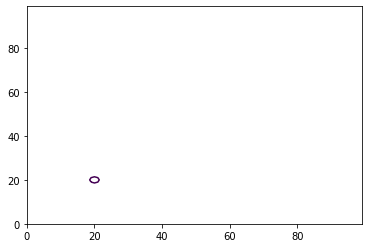

In [4]:
xslice=[slice(35,42)]
yslice=[slice(35,42)]
noentry_slices=[xslice,yslice]
cnts=Grid(dims,start,target,F,U,V,5,.5,(1,1),.2,order=2,advection_term=9)

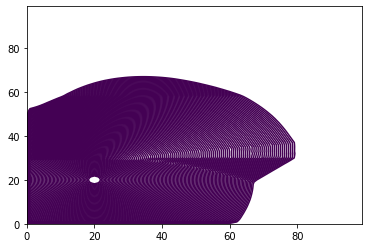

In [5]:
%matplotlib inline
cnts.main()

In [ ]:
x=list(range(35,42))
y=list(range(35,42))
xy=np.meshgrid(x,y)
x,y=xy[0],xy[1]

<IPython.core.display.Javascript object>


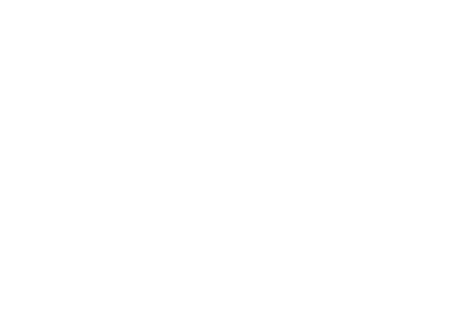

114


<IPython.core.display.Javascript object>


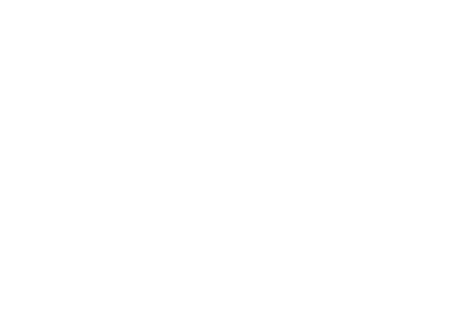

In [8]:
%matplotlib notebook
cnts._plot_contours_with_path3(1,1)
#plt.plot([20,s2],[20,20],color="k",marker="o",linewidth=2)
plt.scatter(start[1],start[0],color="g",label="start")
plt.scatter(target[1],target[0],color="c",label="target")
#plt.scatter(y,x,color="k",label="noentry zone")
plt.legend()
plt.show()
print(cnts._timestep_count)

In [9]:
from math import sin,cos,tan,pi,atan
from scipy.optimize import minimize,NonlinearConstraint
X=target[1]-start[1]
y1=19.5
y2=40
y3=0.5
def fn(x):
    x1,x2,x3=x
    return ((y1/cos(x1))+(y2/cos(x2))+(y3/cos(x3)))/f

def constraint(x):
    x1,x2,x3=x
    return X-y1*tan(x1)-y2*(tan(x2)+(u/f)/cos(x2))-(y3*tan(x3))

con=NonlinearConstraint(constraint,0,0)
s=minimize(fn,(0,0,0),constraints=({"type":"eq","fun":constraint}))
print(s)
x=s["x"]
a0=x[0]
a1=atan(tan(x[1])+(u/f)/cos(x[1]))
a2=x[2]

s1=start[0]+y1*tan(x[0])
s2=s1+y2*tan(a1)
s3=s2+y3*tan(a2)
print(s1,s2,s3)

     fun: 31.46433854855143
     jac: array([2.86495543, 6.99211359, 0.07345033])
 message: 'Optimization terminated successfully.'
    nfev: 48
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.27556216, 0.32038417, 0.27552891])
25.513734755385975 59.858640572955046 60.00000042943482


In [ ]:
%matplotlib notebook
#%matplotlib inline

cnts._plot_contours_with_path3(1)
plt.plot([20,s1,s2,s3],[20,30,58,60],color="b",marker="o",linewidth=1,label="theoretical")
#plt.scatter(y,x,color="k",label="noentry zone")
plt.title("Horizontal flow from 30 to 58")
plt.legend()
plt.show()

In [ ]:
cnts._projected_pts

In [ ]:
cnts._path

In [5]:
import os
import cv2
li=os.listdir("figures")

In [12]:
x=sorted([int(l.strip(".png")) for l in li])
d=[str(i)+".png" for i in x]

In [17]:
img=cv2.imread("figures/1.png")
height,width,channels=img.shape
# fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
# video=cv2.VideoWriter("vid3.avi",fourcc,5,(width,height))
fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
video=cv2.VideoWriter("vid3.avi",fourcc,5,(width,height))

In [18]:
for i in d:
    img=cv2.imread("figures/{}".format(i))
    video.write(img)
video.release()